## Code

I used the lj_start.py code from canvas. The Lennard-Jones potential used in the code is given by,
\begin{equation}
U(r)=\frac{-4}{r^6}\left(1-\frac{1}{r^6}\right).
\end{equation}
The force is then given by,
\begin{equation}
F(r)=-\frac{dU}{dr} = 24r^{-7}-48r^{-13}=\frac{24}{r^7}\left(1-\frac{2}{r^6}\right).
\end{equation}
This is the "missing force calculation" that I will be inserting into the given code.

## Integrator

I implemented the velocity Verlet algorithm under a function called "verlet" that I added to lj_start.py. The function works as follows:
* Advance the positions one time step using equation (1). 
* Calculate the force on the particles using the "compute_forces" function using the new positions. Temporarily save the old forces for use in equation (2).
* Advance the velocities one time step using equation (2).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import lj
%matplotlib inline

In [40]:
Nx = 6
Ny = 6
L = 5.
rcut = 2.5
Nstep = 10000
lj.run(Nx,Ny,L,rcut,Nstep)

In [41]:
xpos = genfromtxt("xpositions.dat",delimiter=",")
ypos = genfromtxt("ypositions.dat",delimiter=",")
xvel = genfromtxt("xvelocities.dat",delimiter=",")
yvel = genfromtxt("yvelocities.dat",delimiter=",")
energy = genfromtxt("energies.dat",delimiter=",")
solid_corr=genfromtxt("correlation.dat",delimiter=",")

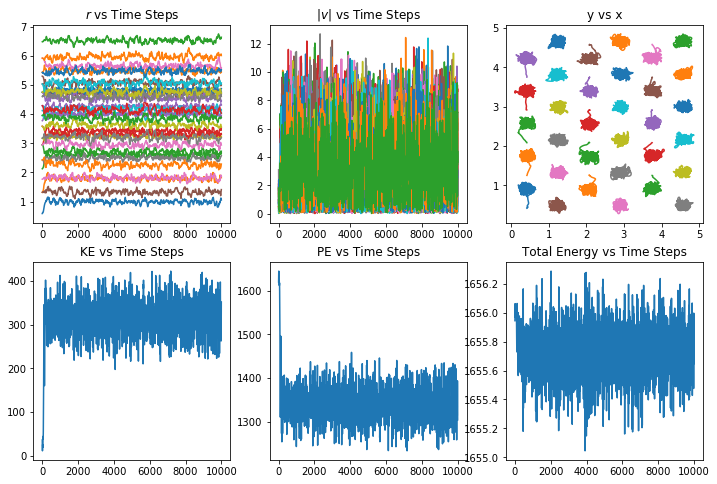

In [58]:
particle = [0,1,2,3,4,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35]
start = 0
N = 9999
step = np.arange(len(xpos[start:N,particle[0]]))

# initialize figures
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))

# plot coordinates
for i in range(len(particle)):
    axes[0][0].plot(step,np.sqrt(xpos[start:N,particle[i]]**2\
                    +ypos[start:N,particle[i]]**2))
for i in range(len(particle)):
    axes[0][1].plot(step,np.sqrt(xvel[start:N,particle[i]]**2\
                    +yvel[start:N,particle[i]]**2))
for i in range(len(particle)):
    axes[0][2].plot(xpos[start:N,particle[i]],ypos[start:N,particle[i]])
for i in range(3):
    axes[1][i].plot(step,energy[start:N,i])

# Titles
axes[0][0].set_title("$r$ vs Time Steps")
axes[0][1].set_title("$|v|$ vs Time Steps")
axes[0][2].set_title("y vs x")
axes[1][0].set_title("KE vs Time Steps")
axes[1][1].set_title("PE vs Time Steps")
axes[1][2].set_title("Total Energy vs Time Steps")



We can see from the energy plot that the Verlet algorithm is doing is indeed keeping the total energy relatively constant. Over $10^4$ time steps, the energy stays at $1655.7 \pm 0.7$.

## Measurements

We can see that the system above is clearly a solid from the "y vs x" plot. All of the particles stay near their relative positions, never straying far from their lattice points. Note that I have excluded a few points that were crossing over the boundary because their connecting lines were blocking the other points. To reduce the density of the system, I will reduce the number of particles (making it less computationally intensive as I move away from a solid).

In [5]:
Nx = 3
Ny = 4
L = 5.
rcut = 2.5
Nstep = 10000
lj.run(Nx,Ny,L,rcut,Nstep)

In [6]:
xpos = genfromtxt("xpositions.dat",delimiter=",")
ypos = genfromtxt("ypositions.dat",delimiter=",")
xvel = genfromtxt("xvelocities.dat",delimiter=",")
yvel = genfromtxt("yvelocities.dat",delimiter=",")
energy = genfromtxt("energies.dat",delimiter=",")
fluid_corr=genfromtxt("correlation.dat",delimiter=",")

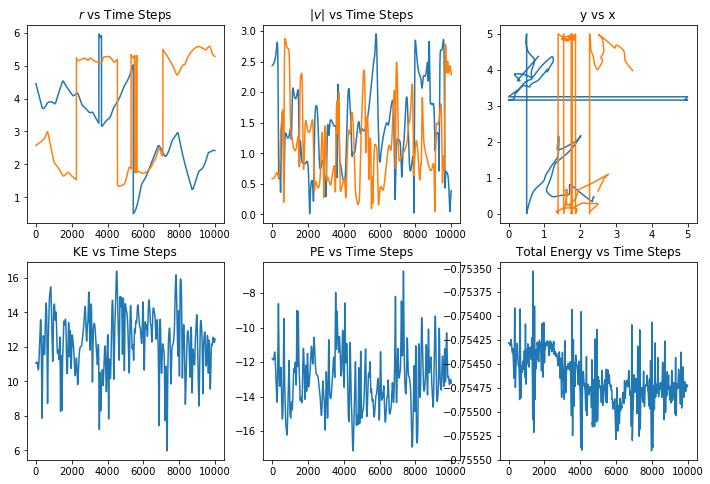

In [7]:
particle = [3,4]
start = 0
N = 9999
step = np.arange(len(xpos[start:N,particle[0]]))

# initialize figures
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))

# plot coordinates
for i in range(len(particle)):
    axes[0][0].plot(step,np.sqrt(xpos[start:N,particle[i]]**2\
                    +ypos[start:N,particle[i]]**2))
for i in range(len(particle)):
    axes[0][1].plot(step,np.sqrt(xvel[start:N,particle[i]]**2\
                    +yvel[start:N,particle[i]]**2))
for i in range(len(particle)):
    axes[0][2].plot(xpos[start:N,particle[i]],ypos[start:N,particle[i]])
for i in range(3):
    axes[1][i].plot(step,energy[start:N,i])

# Titles
axes[0][0].set_title("$r$ vs Time Steps")
axes[0][1].set_title("$|v|$ vs Time Steps")
axes[0][2].set_title("y vs x")
axes[1][0].set_title("KE vs Time Steps")
axes[1][1].set_title("PE vs Time Steps")
axes[1][2].set_title("Total Energy vs Time Steps")

Above, we can observe two of the particles to see that they are no longer restricted to their lattice sites. By reducing the number of particles from 36 to 12, we have seen the phase change to a fluid.

## Measurements(II)

The angle integrated pair correlation functions for both cases above were saved. They are compared below.

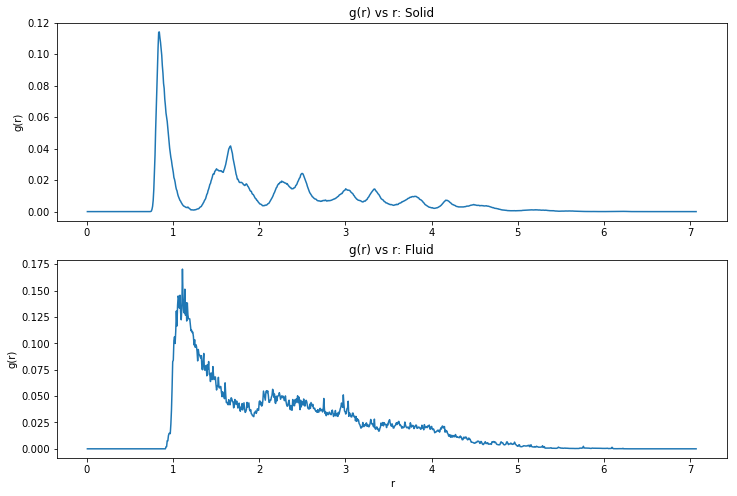

In [59]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(12,8))
axes[0].plot(solid_corr[0],solid_corr[1])
axes[0].set_title("g(r) vs r: Solid")
axes[0].set_ylabel("g(r)")
axes[1].plot(fluid_corr[0],fluid_corr[1])
axes[1].set_title("g(r) vs r: Fluid")
axes[1].set_xlabel("r")
axes[1].set_ylabel("g(r)")

Note that these are time averaged over all time steps. The correlation function measures the average density of particles in an annulus of width $dr$ from any particle. With this understanding, we can make sense of the correlation functions above. Both exhibit strong repulsion at short distances since $g(r)=0$ for values less than about 1. However, the solid correlation function (top) exhibits periodic density peaks due to its lattice structure. The fluid correlation function does not exhibit such behavior, and has a more or less monotonic decrease as $r$ increases. This shows the homogenous structure of the fluid.